Aquesta base de dades recull les dades principals de qualsevol de les persones usuàries o contactes de l’entitat.

Ens hem trobat en què hi ha varies persones amb més d’un ID únic per la qual  cosa crearem un nou ID únic a partir de la suma dels dos IDs. En totes les bases de dades posteriors el primer pas ha estat crear un nou ID a partir del diccionari creat anteriorment. 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Persones.csv',encoding='utf-8',sep=';')
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')
df_i=df

In [3]:
#Seleccionamos las columnas que nos interesan 
df=df[['ID','Adreça principal - Codi postal','Adreça principal - Població','Data Naixement','Gènere',"Tipus d'identificació",'Tipus de relacions actuals','Vinculació discapacitat auditiva','Nº persones a unitat familiar']]

In [4]:
#indexar ID
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

/tmp/ipykernel_11837/68624009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])


,ID,Adreça principal - Codi postal,Adreça principal - Població,Data Naixement,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar
0,c97185e7-9f0f-30e4-b1ff-5bb4a082147f,NaN,NaN,17/03/1983,Femení,NaN,Persones Sòcies Familiars (Entorn),NaN,NaN
1,c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6,NaN,NaN,16/07/1987,Femení,NaN,Persones Sòcies Familiars (Entorn),NaN,NaN
2,c1285915-0512-7d67-ca24-5bb4a020d92c,NaN,NaN,21/04/1986,Femení,NaN,Persones Sòcies Familiars (Nucli),NaN,NaN
3,c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b,08329,TEIA,20/10/1944,Masculí,NIF,NaN,NaN,1.0
4,cb11488f-77db-7f36-3a00-5bb4a0cc9388,NaN,NaN,18/03/2013,Femení,NIF,Persones Sòcies Familiars (Entorn),NaN,5.0


In [5]:
#ver porcentaje de nans por columna
df.isnull().sum()/df.shape[0]*100

ID                                   0.181159
Adreça principal - Codi postal      42.675983
Adreça principal - Població         39.622153
Data Naixement                      33.721532
Gènere                              25.621118
Tipus d'identificació               51.682195
Tipus de relacions actuals          50.750518
Vinculació discapacitat auditiva    59.213251
Nº persones a unitat familiar       60.507246
dtype: float64

In [6]:
# Unir filas con mismo ID y rellenar valores faltantes
df = df.groupby('ID').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)
#eliminar duplicados
df = df.drop_duplicates()
df.drop_duplicates(subset='ID', inplace=True)
df.head()


/tmp/ipykernel_11837/2677021389.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('ID').apply(lambda x: x.fillna(method='ffill')).reset_index(drop=True)


,ID,Adreça principal - Codi postal,Adreça principal - Població,Data Naixement,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar
0,c97185e7-9f0f-30e4-b1ff-5bb4a082147f,NaN,NaN,17/03/1983,Femení,NaN,Persones Sòcies Familiars (Entorn),NaN,NaN
1,c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6,NaN,NaN,16/07/1987,Femení,NaN,Persones Sòcies Familiars (Entorn),NaN,NaN
2,c1285915-0512-7d67-ca24-5bb4a020d92c,NaN,NaN,21/04/1986,Femení,NaN,Persones Sòcies Familiars (Nucli),NaN,NaN
3,c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b,08329,TEIA,20/10/1944,Masculí,NIF,NaN,NaN,1.0
4,cb11488f-77db-7f36-3a00-5bb4a0cc9388,NaN,NaN,18/03/2013,Femení,NIF,Persones Sòcies Familiars (Entorn),NaN,5.0


In [7]:
#valores unicos tipus de relacions actuals
df['Tipus de relacions actuals'].unique()

array(['Persones Sòcies Familiars (Entorn)',
       'Persones Sòcies Familiars (Nucli)', nan,
       'Persona Socia Familiar(Titular),Persones Voluntàries',
       'Persones Sòcies Individuals', 'Persona Socia Familiar(Titular)',
       'Participant Grup Universitaris,Participant SAES',
       'Persones Sòcies Individuals,Participant SASP',
       'Pre-Participants SAAF',
       'Persones Sòcies Individuals,Participant Xarxa de Dones',
       'Persones Voluntàries', 'Participant Grup Universitaris',
       'Persones Sòcies Individuals,Persones Voluntàries',
       'Persones Sòcies Familiars (Nucli),Participant SAAF',
       'Pre-Participants SAAF,Persones Sòcies Familiars (Nucli)',
       'Persones Sòcies Individuals,Participant Xarxa de Dones,Participant SAES',
       'Participant SAAF',
       'Persones Usuàries,Persones Sòcies Individuals,Participant Xarxa de Dones,Persones Voluntàries',
       'Pre-Participants SAAF,Persones Sòcies Familiars (Nucli),Participant SAAF',
       'Parti

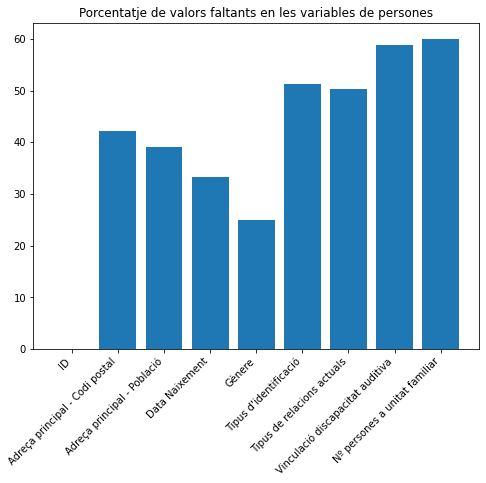

In [8]:
#ver porcentaje de nans por columna
df.isnull().sum()/df.shape[0]*100
#graficar porcentaje de nans
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
df.isnull().sum()/df.shape[0]*100
plt.bar(df.columns,df.isnull().sum()/df.shape[0]*100)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentatje de valors faltants en les variables de persones')
plt.show()

In [9]:
#nulls de df
df.isnull().sum()

ID                                     0
Adreça principal - Codi postal      1612
Adreça principal - Població         1494
Data Naixement                      1274
Gènere                               955
Tipus d'identificació               1959
Tipus de relacions actuals          1920
Vinculació discapacitat auditiva    2246
Nº persones a unitat familiar       2293
dtype: int64

In [10]:
#pasar df_persones a csv
df.to_csv('dades_persones_final.csv', index=False, encoding='utf-8')